# Ford GoBike System Data

# Preliminary Wrangling
This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area

In [2]:
# Import the required libraries¶
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np

# Gather data

In [3]:
# Set the path where the data files are located and gte full file path using glob library.
# We are using data files for the year 2019.
# though more data is available, due to limitations on how many files can be processed in a single machine,
# I am limiting the data set to only year 2019

path = r'D:\Rekha\Data_Viz'  
all_files = glob.glob(path + "/*.csv")

In [4]:
print(all_files)

['D:\\Rekha\\Data_Viz\\201901-fordgobike-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201902-fordgobike-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201903-fordgobike-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201904-fordgobike-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201905-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201906-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201907-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201908-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201909-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201910-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201911-baywheels-tripdata.csv', 'D:\\Rekha\\Data_Viz\\201912-baywheels-tripdata.csv']


In [5]:
# go thru all the files and read them into dataframe by pandas library
# At the end, concatenate all the dataframes
df_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,low_memory=False,error_bad_lines=False)
    df_list.append(df)

frame = pd.concat(df_list, axis=0, ignore_index=True,sort=False)


# Assess

In [21]:
print(frame.shape)
print(frame.dtypes)


(2506983, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object


In [120]:
frame.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
5,6733,2019-01-31 22:35:50.8130,2019-02-01 00:28:04.5120,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,No,NaN
6,1188,2019-01-31 23:54:38.9010,2019-02-01 00:14:27.9000,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423180,5114,Subscriber,No,NaN
7,1254,2019-01-31 23:48:50.0920,2019-02-01 00:09:44.4970,318.0,San Carlos St at Market St,37.330698,-121.888979,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,3967,Subscriber,No,NaN
8,3153,2019-01-31 23:17:05.4620,2019-02-01 00:09:39.4570,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,70.0,Central Ave at Fell St,37.773311,-122.444293,4813,Subscriber,No,NaN
9,323,2019-01-31 23:59:47.5680,2019-02-01 00:05:11.1770,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,1976,Subscriber,No,NaN


In [11]:
frame.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [14]:
frame.isnull().sum()

# We see that around 80K records do not have station ID/Name information


duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [15]:
# what are differnet user types
frame['user_type'].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [17]:
# what are the different rental access method used
# looks like most are from app.
frame['rental_access_method'].value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [18]:
# what are the different bike_share_for_all_trip
# looks like bike_share_for_all_trip is kind of membership program
frame['bike_share_for_all_trip'].value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [75]:
frame.duplicated().sum()
# checking to see any duplicate records. 
# looks like no duplicate records

0

In [114]:
# Find out about logical relation between user_type and bike_share_for_all
# looks like bike_share_for_all is a  type of subscription program
frame[['user_type', 'bike_share_for_all_trip']].drop_duplicates()

,user_type,bike_share_for_all_trip
0,Subscriber,No
2,Customer,No
12,Subscriber,Yes
1240946,Customer,NaN
1240950,Subscriber,NaN


# Clean

## Define

* Convert Start and End time to date format
* Add column Month, week, Hour by extracting Start_Time
* Convert duration to Minutes from seconds
* Convert user_type tp a category type

In [6]:
# make a copt of original data frame
bike_clean_df = frame.copy()

In [7]:
# convert start/end time to datetime format
bike_clean_df.start_time = pd.to_datetime(bike_clean_df.start_time )
bike_clean_df.end_time = pd.to_datetime(bike_clean_df.end_time )

In [8]:
# convert User_Type to category to help in drawing plot
bike_clean_df.user_type = bike_clean_df.user_type.astype('category')

In [9]:
# add colum n for Month
bike_clean_df['month'] = bike_clean_df["start_time"].dt.strftime('%B')

In [10]:
# add column for day
bike_clean_df['day'] = bike_clean_df["start_time"].dt.strftime('%a')

In [11]:
# add column for Hour
bike_clean_df['hour'] = bike_clean_df["start_time"].dt.hour

In [12]:
# convert duration to minutes
bike_clean_df['duration_mins'] = round(bike_clean_df['duration_sec'] / 60 )

In [13]:
bike_clean_df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day,hour,duration_mins
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,January,Thu,17,1347.0
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,January,Thu,20,1098.0
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,January,Thu,18,1044.0
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,January,Thu,19,745.0
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,January,Thu,14,1012.0
5,6733,2019-01-31 22:35:50.813,2019-02-01 00:28:04.512,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,No,NaN,January,Thu,22,112.0
6,1188,2019-01-31 23:54:38.901,2019-02-01 00:14:27.900,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,146.0,30th St at San Jose Ave,37.742314,-122.423180,5114,Subscriber,No,NaN,January,Thu,23,20.0
7,1254,2019-01-31 23:48:50.092,2019-02-01 00:09:44.497,318.0,San Carlos St at Market St,37.330698,-121.888979,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,3967,Subscriber,No,NaN,January,Thu,23,21.0
8,3153,2019-01-31 23:17:05.462,2019-02-01 00:09:39.457,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,70.0,Central Ave at Fell St,37.773311,-122.444293,4813,Subscriber,No,NaN,January,Thu,23,53.0
9,323,2019-01-31 23:59:47.568,2019-02-01 00:05:11.177,223.0,16th St Mission BART Station 2,37.764765,-122.420091,129.0,Harrison St at 20th St,37.758862,-122.412544,1976,Subscriber,No,NaN,January,Thu,23,5.0


In [14]:
bike_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  month                    object        
 16  day                      object        
 17  hour                     in

In [42]:
#create a new data frame with only selected fields
bike_clean_df=bike_clean_df.drop([ 'start_station_id' ,'start_station_name' ,'end_station_id', 
                           'end_station_name' ], axis = 1) 

In [15]:
bike_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  month                    object        
 16  day                      object        
 17  hour                     in

#### What is the structure of your dataset?
This data is information about individual rides made in bike-sharing system covering the greater San Francisco
Bay area.
Data was pulled from location: https://www.lyft.com/bikes/bay-wheels/system-data

Data for this project is colelcted for year 2019
Data fields are :

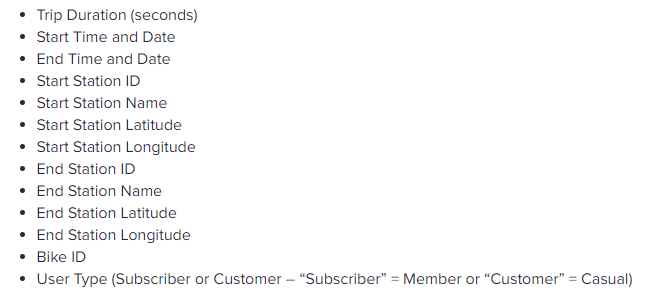


### What is/are the main feature(s) of interest in your dataset?

I am interested in knowing :

* When are most trips taken in terms of time of day, day of the week, or month of the year?
* How does average trip duration varies with different user_types?
* How does bike ride volume in different area like San Francisco ,  Oakland or Bay Area ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
* Trip Start_Time will be helpful in extracting the Month, Day and Hour and thus how bike ride was distibuted over this date/time range.
* We can use Station Latitude and Longitue to figure out location and knowing ride volume in these different areas

# Univariate Exploration

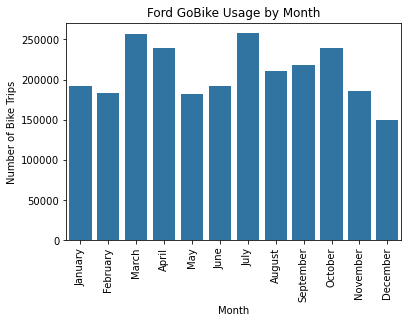

In [20]:
# monthly usage of bike 
base_color = sb.color_palette()[0]
ax=sb.countplot(data = bike_clean_df, x = 'month',  color = base_color)
plt.ylabel('Number of Bike Trips')
plt.xlabel('Month')
ax.set_title('Ford GoBike Usage by Month')
plt.xticks(rotation=90);

##### Observation:
Looks like bike usage is reduced sligghtly during winter months like November, December, January and February. Peak is in July and October in the year 2019

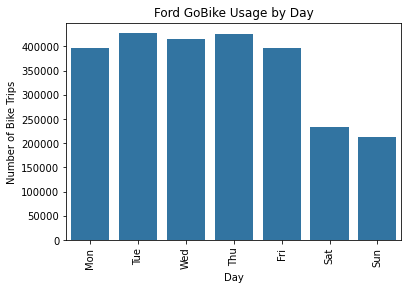

In [44]:
# weekday usage of bike 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
ax = sb.countplot(data = bike_clean_df, x = 'day',  color = base_color ,order = weekday)
plt.ylabel('Number of Bike Trips')
plt.xlabel('Day')
ax.set_title('Ford GoBike Usage by Day')
plt.xticks(rotation=90);


##### Observation:
Based on one year data of 2019 - Weekdays are busier than weekends. That can be due to working folks using the bike as part of their commute. 

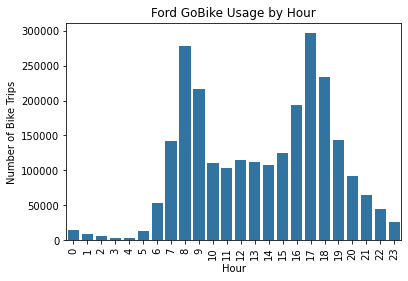

In [22]:
# Hourly usage of bike 

base_color = sb.color_palette()[0]
ax = sb.countplot(data = bike_clean_df, x = 'hour',  color = base_color )
ax.set_title('Ford GoBike Usage by Hour')
plt.ylabel('Number of Bike Trips')
plt.xlabel('Hour')
plt.xticks(rotation=90);


##### Observation:
Based on one year data of 2019 - rush hours are 7am to 9 am . Evening 4pm to 7pm. Peak hour is 8 am and 5 pm. Again, we can attribute  this to being used by working people as part of their commute

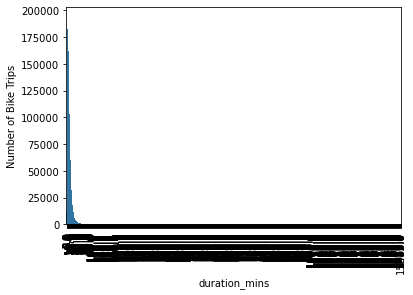

In [23]:
# Bike ride duartion

base_color = sb.color_palette()[0]
sb.countplot(data = bike_clean_df, x = 'duration_mins',  color = base_color )
plt.ylabel('Number of Bike Trips')
plt.xlabel('duration_mins')
plt.xticks(rotation=90);


##### Observation:
This data looks highly right skewed . Duration value ranges from 1 min to 15201 minutes , which is a wide range. Lets try to change the scale to log instead of linear

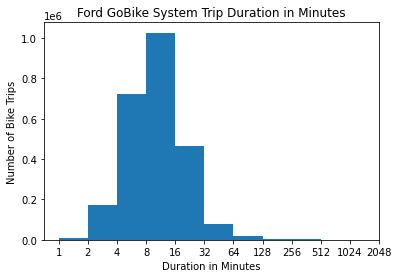

In [25]:
# duration value ranges from 1 min to 15201 minutes , which is a wide range
# regular graph plot shows data is right skewed
bin_edges = 2 ** np.arange(0, np.log2(2048), 1)
plt.hist(bike_clean_df[ 'duration_mins'], bins=bin_edges)

# Scale the plot (minimum duration actually is 61 sec > 1 min)
plt.xscale('log', basex=2)
plt.title('Ford GoBike System Trip Duration in Minutes')
xtick_locs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
plt.ylabel('Number of Bike Trips');
plt.xlabel('Duration in Minutes')
plt.xticks(xtick_locs, xtick_locs);


##### Observation:
From this plot, it looks like most of the ride was between 8 to 16 minutes


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Looks like bike usage is reduced sligghtly during winter months like November, December, January and February. Peak is in July and October in the year 2019
* Based on one year data of 2019 - Weekdays are busier than weekends. That can be due to working folks using the bike as part of their commute. 
* Based on one year data of 2019 - rush hours are 7am to 9 am . Evening 4pm to 7pm. Peak hour is 8 am and 5 pm. Again, we can attribute  this to being used by working people as part of their commute
* This data looks highly right skewed . Duration value ranges from 1 min to 15201 minutes , which is a wide range. 
* For the duration analysis, changing the scale to log instead of linearFrom this plot, it looks like most of the ride was between 8 to 16 minutes


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Nothing unusual. 
* Duration was converted from seconds to minutes for easy readability. Since the range was huge, used log scale to plot the graph
* Also, time was used to extract Hour, Month and Day from it to analyse data from different perspecive.

# Bivariate Exploration

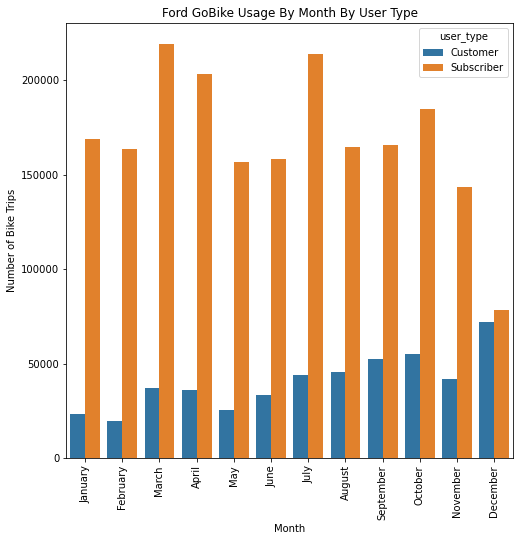

In [27]:
# explore Bike usage over User Type.
# We are using clustered bar chart to compare values for two different type of users i.e. Customer v/s Subscriber
plt.figure(figsize=(8, 8))
sb.countplot(data = bike_clean_df, x = 'month', hue = 'user_type', palette=["C0", "C1"])
plt.title('Ford GoBike Usage By Month By User Type')
plt.ylabel('Number of Bike Trips')
plt.xlabel('Month')
plt.xticks(rotation=90);


##### Observation

Looks like yearly subscrive has more usage in all months, though Decemember seems to be almost same for both tyep users.
Its possible that December there might be more visitors who are using bike while touring. Also, winter / holiday season might cause local working people to less commute which in turn reduces their bike usage

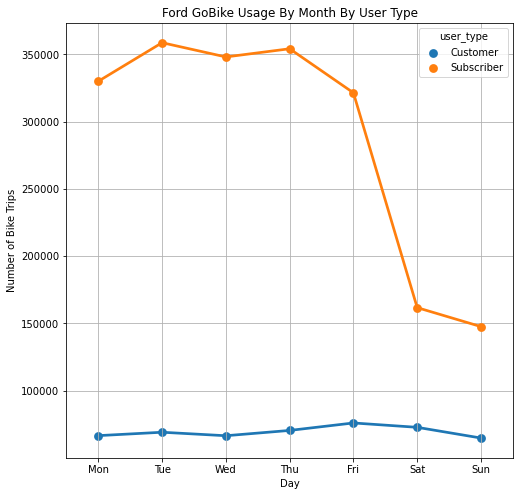

In [29]:
# customer usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(8,8))

user_by_day = bike_clean_df.groupby(['day', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=user_by_day, x='day', y=0, hue = 'user_type', order = weekday);
plt.title('Ford GoBike Usage By Day By User Type')
plt.xlabel('Day')
plt.ylabel('Number of Bike Trips');
plt.grid();

##### Observation

Looks like bike usage by customer is way less than subscribers in all days of the week.
Also, for customer, there isi not much dfference in bike usage on different days. Weekends are slightly higher than normal work days.
But for subscribers, who are regular users, weekday are their peak usage. Weekend very less activity by them

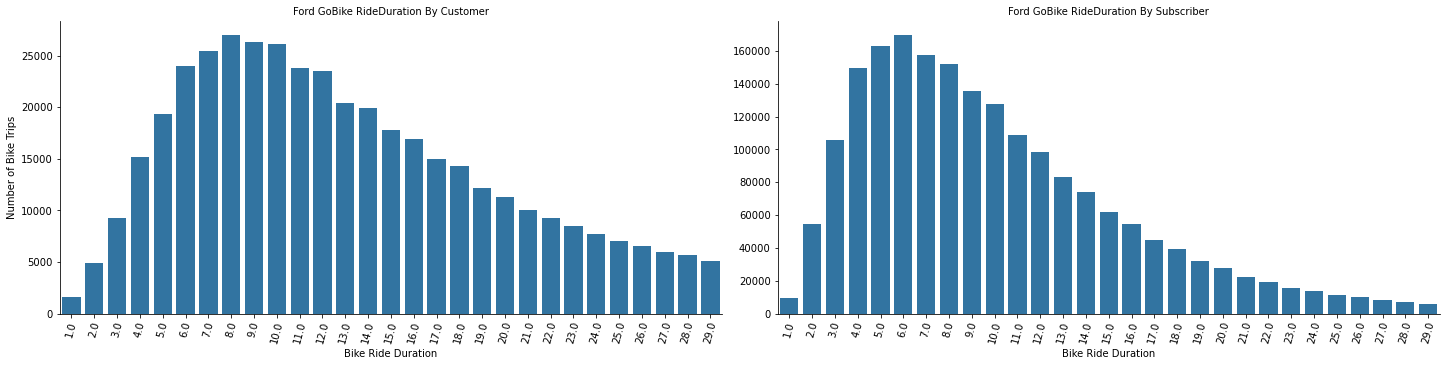

In [33]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
base_color = sb.color_palette()[0]
data = bike_clean_df.query('duration_mins < 30 ')
data.head(10)

graph = sb.catplot(data=data, x = 'duration_mins', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

graph.set_axis_labels('Bike Ride Duration', 'Number of Bike Trips')
graph.set_titles('Ford GoBike Ride Duration By ' + '{col_name}')


graph.set_xticklabels(rotation=75);

##### Observation
 
Average bike ride duration is almost same for customer v/s subscriber. 6 to 12 minutes seems to be the most commonly used duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I tried to compare bike usage against user type. Overall usage by customers is always less than subscribers. Customer usage is more on weekends, which suggests, customers could be occasional visitors visiting the city. Their usage is also more on Saturday and Sunday. On the other hand, subscribers are regular users who use it for daily commute purposes. Bike usage from them is more on weekdays.  Weekends their activity is significantly less.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Interestingly, bike usage duration is almost the same irrespective of customers or subscribers. Their popular usage time is between 6 to 12 minutes. This suggests that people use a bike for short commutes like Subscribers might take the bus or train and then take the bike from station to their final destination. For customers, they could be using a bike as hop and go to visit multiple destinations while touring the city

In [35]:
bike_clean_df['start_area_name'] = bike_clean_df['start_station_longitude'].apply(lambda x: 'San Fransicio' if -122.5<=x<-122.33
                                                  else 'East Bay' if -122.33<=x<-122.1
                                                  else 'San Jose' if -122.1<=x<-121.8
                                                       else 'others')

bike_clean_df.start_area_name.value_counts()

San Fransicio    1852856
East Bay          515687
San Jose          138327
others               113
Name: start_area_name, dtype: int64

# Multivariate Exploration

In [36]:
bike_clean_df.start_area_name.value_counts()


subscriber_area_df = bike_clean_df[bike_clean_df['user_type'] == 'Subscriber'].groupby(['month', 'start_area_name']).agg({'bike_id':'count'}).reset_index()

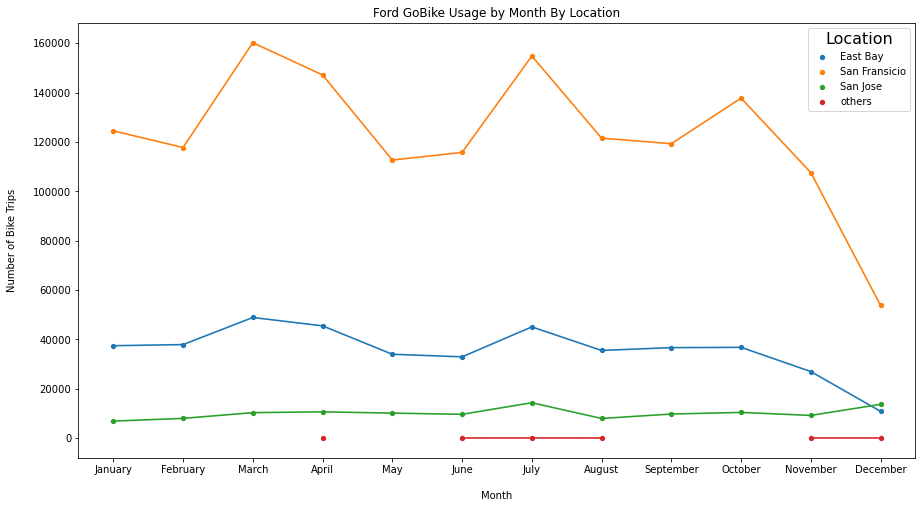

In [38]:
# Comparing monthly number of bike trips per subscribers, based on location area 
plt.figure(figsize = (15,8))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = sb.pointplot(data = subscriber_area_df, x='month', y='bike_id', hue='start_area_name', order = months,scale=.6,  height=5, aspect=2);
ax.set_title('Ford GoBike Usage by Month By Location')
plt.xlabel('Month', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)

# Legend
leg = ax.legend()
leg.set_title('Location', prop={'size': 16})

plt.show()

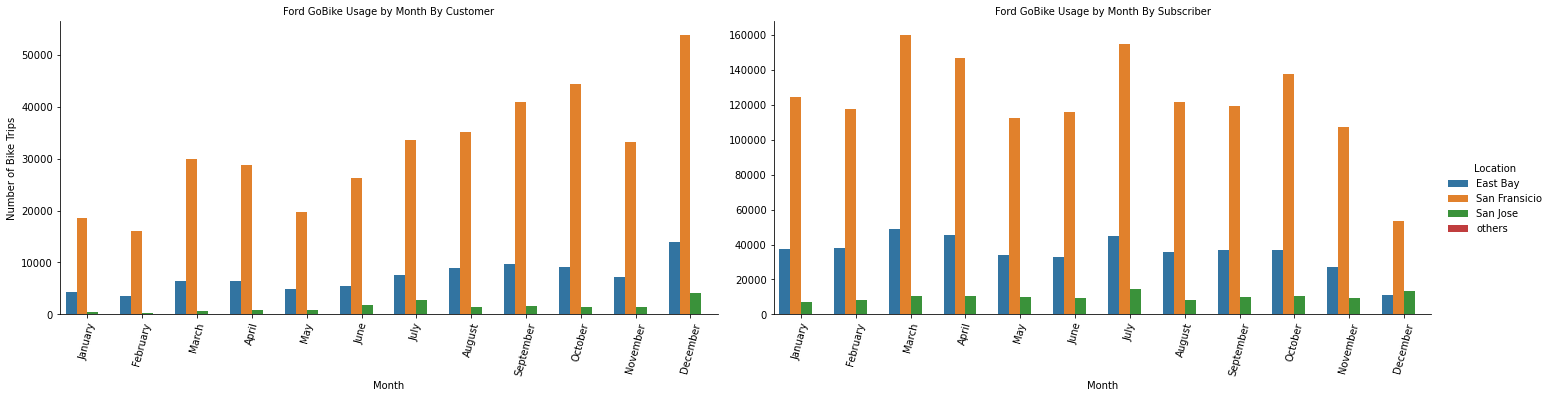

In [40]:

# Monthly usage - user type and Area

graph = sb.catplot(data=bike_clean_df, x='month', col="user_type", hue="start_area_name", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Location')
graph.set_titles("Ford GoBike Usage by Month By " + "{col_name}")


graph.set_xticklabels(rotation=75);

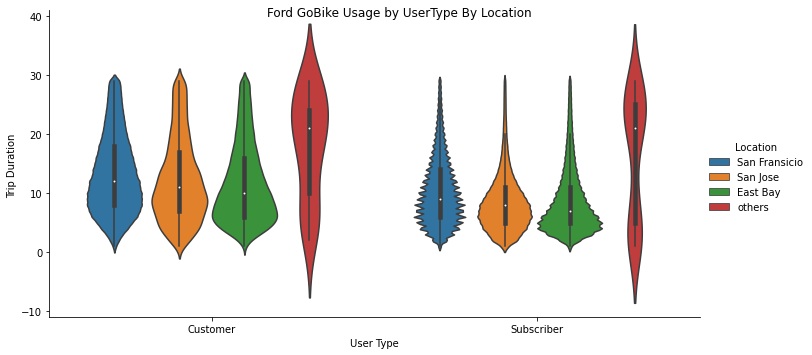

In [42]:

# Violinplot - duration (min) per user type and area
data = bike_clean_df.query('duration_mins < 30')
graph = sb.catplot(data=data, x='user_type', y="duration_mins", hue="start_area_name", kind="violin", height=5, aspect=2);
graph.fig.suptitle('Ford GoBike Usage by UserType By Location')
graph.set_axis_labels("User Type", "Trip Duration ")
graph._legend.set_title('Location')


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For multivariate graph,  I included 'Location Area' to other User_Type and Day/Month/Hour bike ride.
San Fancisco is the location where bike ride is heavily used, followed by Bay area and then San Jose.

### Were there any interesting or surprising interactions between features?

Again, there is no significant difference in trip duration irrespcive of city. For customers, majority of th eusage is between 8 to 12 minutes.
For subscribers, majority if the usage is between 6 to 10 minutes.